## Simple ATLAS OpenData HEP analysis Julia notebook example

#### This is the same analysis as in the C++ notebook found at https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/8-TeV-examples/cpp/ATLAS_OpenData_8-TeV_cpp_simple_cut_and_count_analysis_example.ipynb

As a first step we load the required packages:  
- UnROOT: Used to read in .root files and converting the TTrees into a LazyTree.
- CairoMakie: Plotting
- FHist: Histogram generation  

In [ ]:
using UnROOT
using CairoMakie
using FHist

Next we have to open the data that we want to analyze. It is stored in a *.root file.   
We load our data using the `LazyTree` and `ROOTFile` functions.

In [2]:

tree = UnROOT.LazyTree(UnROOT.ROOTFile("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root"), "mini", ["lep_n", "lep_charge", "lep_type", "lep_pt", "lep_phi", "lep_eta", "lep_E"])


,lep_n,lep_eta,lep_type,lep_pt,lep_E,lep_phi,lep_charge
,UInt32,SubArray{Float3,SubArray{UInt32,SubArray{Float3,SubArray{Float3,SubArray{Float3,SubArray{Float3
1,1,[1.71],[11],[29800.0],[85100.0],[-2.79],[-1.0]
2,2,"[2.25, 2.12]","[11, 11]","[93100.0, 20100.0]","[446000.0, 84500.0]","[1.85, -0.883]","[-1.0, 1.0]"
3,2,"[-0.872, -1.63]","[11, 11]","[43200.0, 37300.0]","[60700.0, 98700.0]","[2.48, -0.678]","[1.0, -1.0]"
4,1,[-1.13],[11],[72200.0],[123000.0],[0.96],[1.0]
5,1,[1.8],[11],[45100.0],[140000.0],[-0.987],[1.0]
6,2,"[0.396, 2.2]","[11, 11]","[67700.0, 15000.0]","[73100.0, 68300.0]","[2.21, -1.42]","[-1.0, 1.0]"
7,2,"[1.23, 1.25]","[11, 11]","[116000.0, 19500.0]","[216000.0, 36900.0]","[1.05, -2.66]","[-1.0, 1.0]"
8,1,[-1.9],[11],[31800.0],[109000.0],[-2.46],[1.0]
9,2,"[1.57, 1.6]","[11, 11]","[58900.0, 34400.0]","[148000.0, 88600.0]","[0.269, -2.39]","[1.0, -1.0]"


`tree` is a `LazyTree` object containing selected branches of the TTree "mini", if no branches are specified tree will contain all branches.

## Data selection

Our first step is to select only the first 10% of the events, this can be done using `Iterators.take()`, iterators are lazy and will only allocate the required data when it's needed.

In [3]:
fraction_events = 0.1;
events_to_run =  Int(length(tree) * fraction_events) #Total events: 7.500.000 -> We only want to take 750.000.
tree = Iterators.take(tree, events_to_run);


Now we want to cut parts of our data to the specified requirements that we are looking for.  
 This is done with the Iterators.filter() function which filters events for which the given condition is true.  This is a lazy operation as well and won't allocate memory until we access the data.

### 1. At least two leptons.

In [4]:
tree = Iterators.filter(x->getproperty(x, :lep_n)>1, tree);

### 2.  The two leading leptons needs to be  of the same family (i.e. electrons or muons).

In [5]:
tree = Iterators.filter(x->getproperty(x, :lep_type)[1] == getproperty(x, :lep_type)[2], tree);

### 3. The two selected leptons must have opposite charge.

In [6]:
tree = Iterators.filter(x->getproperty(x ,:lep_charge)[1] != getproperty(x, :lep_charge)[2], tree);

## Histogram creation:
### We want a histogram with 20 equally spaced bins between 0 and 200.

In [7]:
hist = FHist.Hist1D(Float64, bins=0:10:200)

┌                              ┐ 
   [  0.0,  10.0) ┤  0.0                           
   [ 10.0,  20.0) ┤  0.0                           
   [ 20.0,  30.0) ┤  0.0                           
   [ 30.0,  40.0) ┤  0.0                           
   [ 40.0,  50.0) ┤  0.0                           
   [ 50.0,  60.0) ┤  0.0                           
   [ 60.0,  70.0) ┤  0.0                           
   [ 70.0,  80.0) ┤  0.0                           
   [ 80.0,  90.0) ┤  0.0                           
   [ 90.0, 100.0) ┤  0.0                           
   [100.0, 110.0) ┤  0.0                           
   [110.0, 120.0) ┤  0.0                           
   [120.0, 130.0) ┤  0.0                           
   [130.0, 140.0) ┤  0.0                           
   [140.0, 150.0) ┤  0.0                           
   [150.0, 160.0) ┤  0.0                           
   [160.0, 170.0) ┤  0.0                           
   [170.0, 180.0) ┤  0.0                           
   [180.0, 190.0) ┤  0.0                           
   [190.0, 200.0) ┤  0.0                           
                  └                              ┘ 
edges: 0:10:200
bin counts: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
total count: 0.0

### We use a for loop to fill our histogram with the PT of the leading lepton (divided by 1000 so we get GeV instead of MeV).  

In [8]:
for event in tree
 atomic_push!(hist, event.lep_pt[1]/1000)
end

## Plotting the histogram

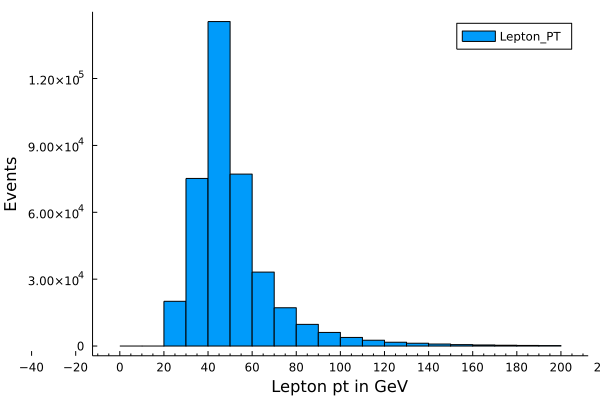

In [28]:
plot(hist, label = "Lepton_PT", xlabel = "Lepton pt in GeV", ylabel = "Events", xticks = 20, xminorticks = 4, grid = false, yformatter = :scientific)

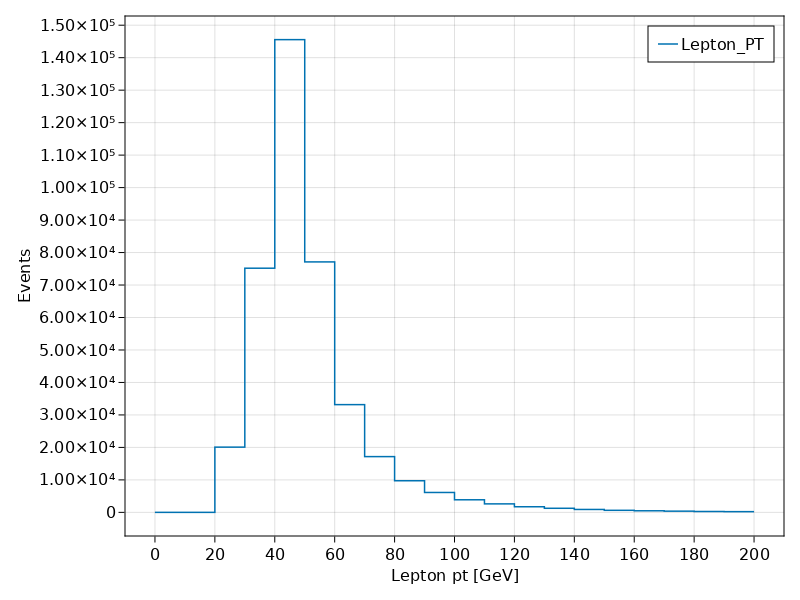

In [36]:
p1 = stairs(hist, label = "Lepton_PT", axis = ( xlabel = "Lepton pt [GeV]", ylabel = "Events", yticks = 0:10^4:1.5*10^5,xticks = 0:20:200, xminorticks = IntervalsBetween(4),xminorticksvisible = true))
axislegend()
current_figure()

### We can easily add some statistics to our plot.

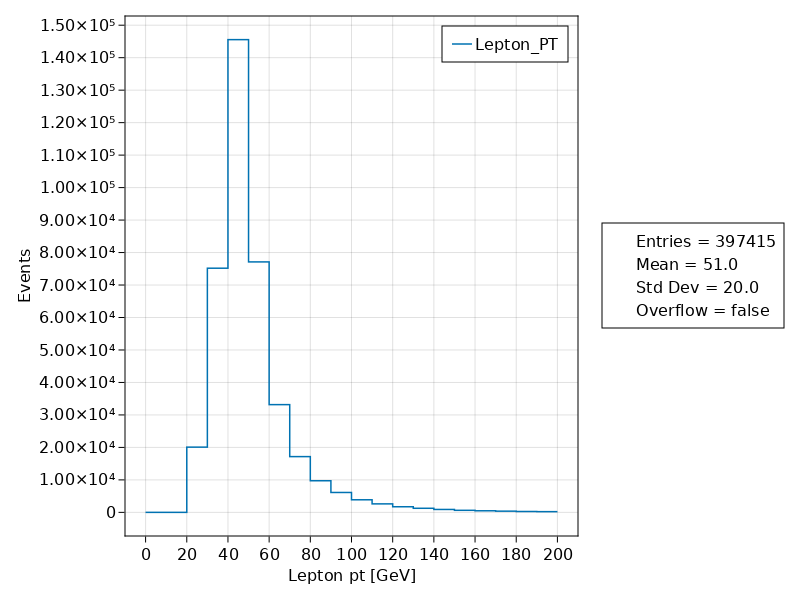

In [38]:
FHist.statbox!(p1, hist)